In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Prosenjeet Shil\sem2 practicals\AIML lab\15-03-25\driver-data.csv")
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [6]:
df.shape

(4000, 3)

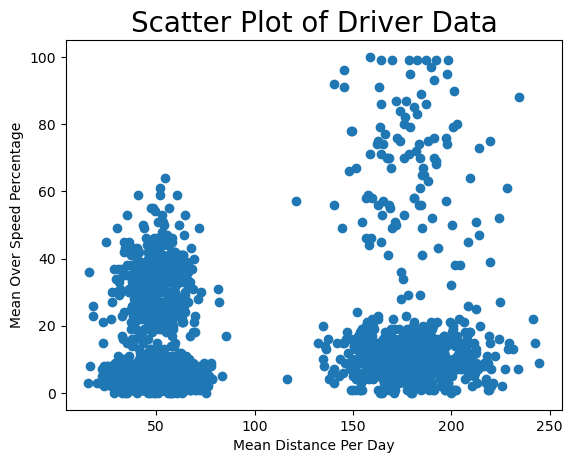

In [9]:
plt.plot(df.mean_dist_day, df.mean_over_speed_perc, 'o')
plt.xlabel('Mean Distance Per Day')
plt.ylabel('Mean Over Speed Percentage')
plt.title('Scatter Plot of Driver Data', fontsize=20)
plt.show()

In [11]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [13]:
data = df.drop(['id'], axis=1)
cluster_model = KMeans(n_clusters=2)
cluster_model.fit(data)

KMeans(n_clusters=2)

In [15]:
df['labels'] = cluster_model.labels_

In [17]:
df['labels']

0       0
1       0
2       0
3       0
4       0
       ..
3995    1
3996    1
3997    1
3998    1
3999    1
Name: labels, Length: 4000, dtype: int32

In [19]:
df.head()

,id,mean_dist_day,mean_over_speed_perc,labels
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0


In [21]:
df.labels.unique()

array([0, 1])

In [23]:
df['labels'].value_counts()

labels
0    3200
1     800
Name: count, dtype: int64

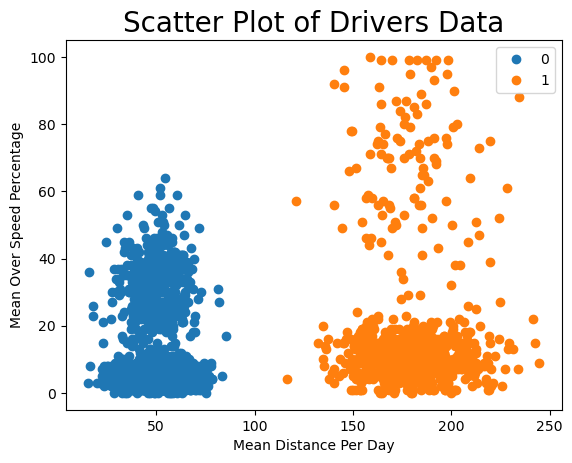

In [25]:
for label in df.labels.unique():
    plt.plot(df.loc[df.labels == label, 'mean_dist_day'],
             df.loc[df.labels == label, 'mean_over_speed_perc'], 'o', label = label)
plt.xlabel('Mean Distance Per Day')
plt.ylabel('Mean Over Speed Percentage')
plt.title('Scatter Plot of Drivers Data', fontsize=20)
plt.legend()
plt.show()

In [27]:
cluster_model.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [29]:
error = []

for k in range(1, 11):
    cluster_model = KMeans(k)
    cluster_model.fit(data) 
    error.append(cluster_model.inertia_)

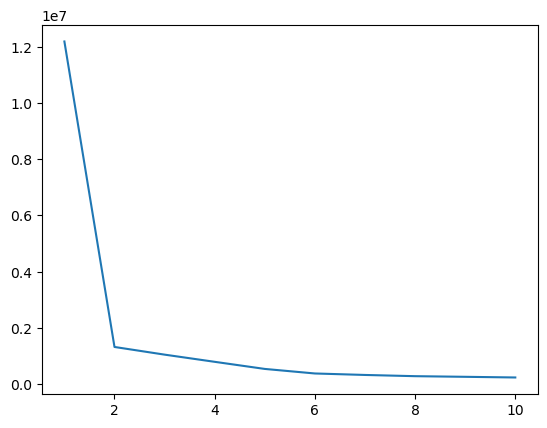

In [31]:
plt.plot(range(1,11), error)
plt.show()

In [33]:
df[df.labels == 0]

,id,mean_dist_day,mean_over_speed_perc,labels
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3195,3423312761,47.56,5,0
3196,3423314346,39.39,8,0
3197,3423313451,46.85,7,0
3198,3423313552,37.68,7,0
